## Exponential Smoothing

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("../train_data.csv")
valid_data = pd.read_csv("../valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(534, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [4]:
print(valid_data.shape)
valid_data.head()

(229, 2)


,Date,count
0,2014-02-09,196
1,2014-02-10,299
2,2014-02-11,224
3,2014-02-12,216
4,2014-02-13,212


# Required Preprocessing 

In [5]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [6]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

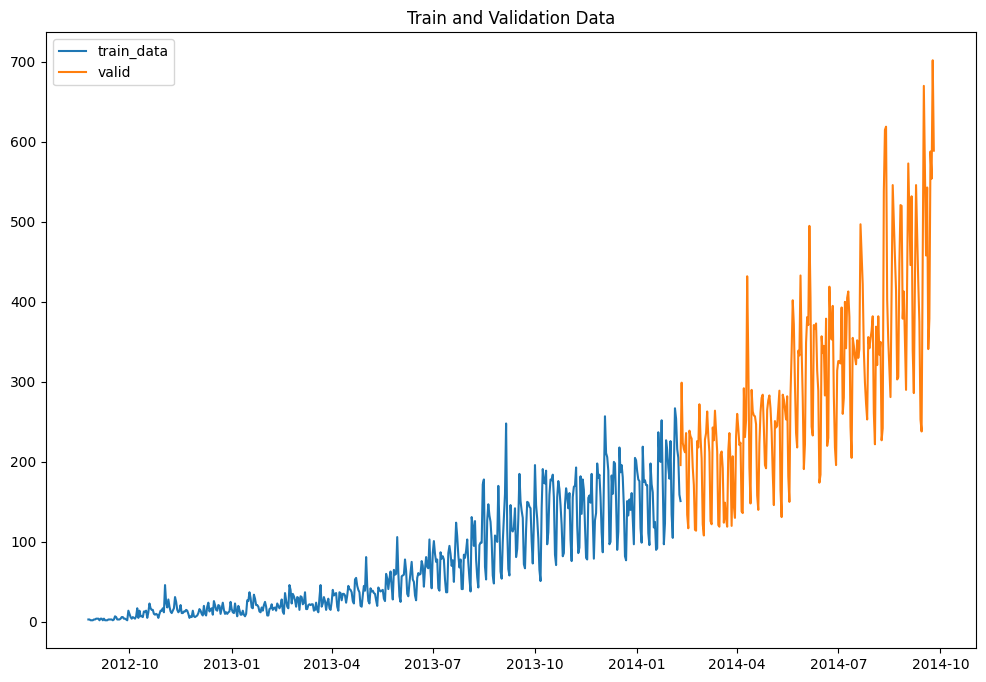

In [7]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Exponential Smoothing

In [14]:
from statsmodels.tsa.api import SimpleExpSmoothing

<img src = "alpha values.png">

In [23]:
model = SimpleExpSmoothing(np.asarray(train_data['count']))
model = model.fit(smoothing_level=0.7, optimized=False) 

valid_data['SES'] = model.forecast(len(valid_data)) 

In [24]:
model.params

{'smoothing_level': 0.7,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 3.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [25]:
valid_data.head()

,Date,count,SES
Date,,,
2014-02-09,2014-02-09,196,158.105647
2014-02-10,2014-02-10,299,158.105647
2014-02-11,2014-02-11,224,158.105647
2014-02-12,2014-02-12,216,158.105647
2014-02-13,2014-02-13,212,158.105647


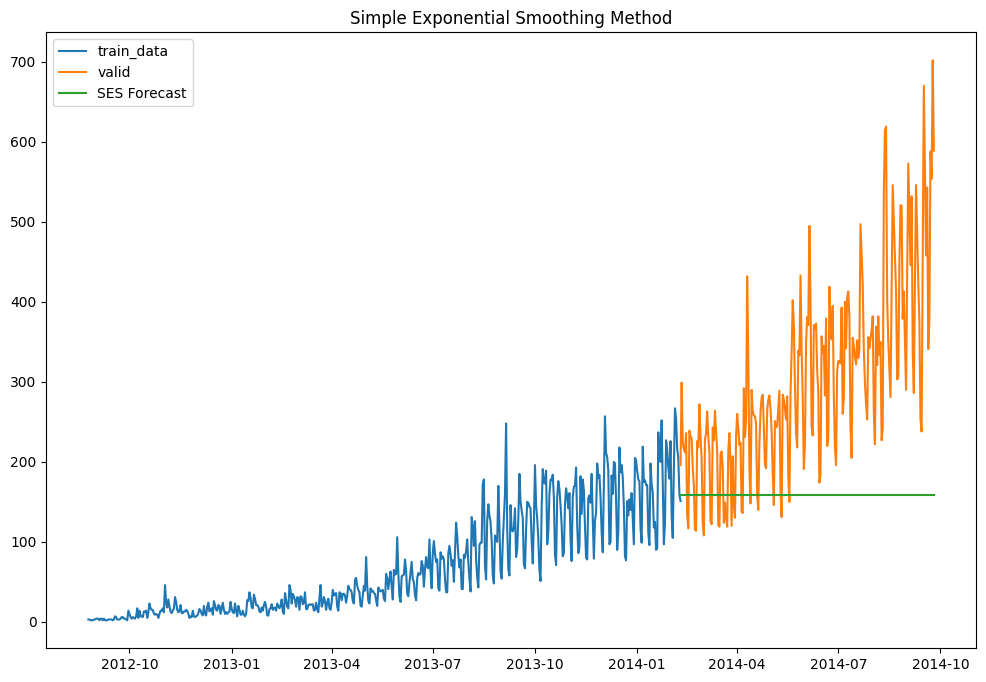

In [26]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['SES'], label='SES Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

In [29]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['SES']))
print('The RMSE value for Simple Exponential Smoothing Method is', rmse)

The RMSE value for Simple Exponential Smoothing Method is 185.7770618495414


In [30]:
RMSE_df = pd.DataFrame([], columns=['RMSE'])
RMSE_df.loc['SES'] = rmse

In [31]:
RMSE_df

,RMSE
SES,185.777062


# Double Exponential Smoothing

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [70]:
model = ExponentialSmoothing(np.asarray(train_data['count']), trend='add')
model = model.fit(smoothing_level=0.3) #, smoothing_slope=0.00001) # , initial_trend = 1.2) #  

valid_data['Holt_linear'] = model.forecast(len(valid_data))

In [71]:
model.params

{'smoothing_level': 0.3,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1.5967832626491358,
 'initial_trend': 0.34019319526789865,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

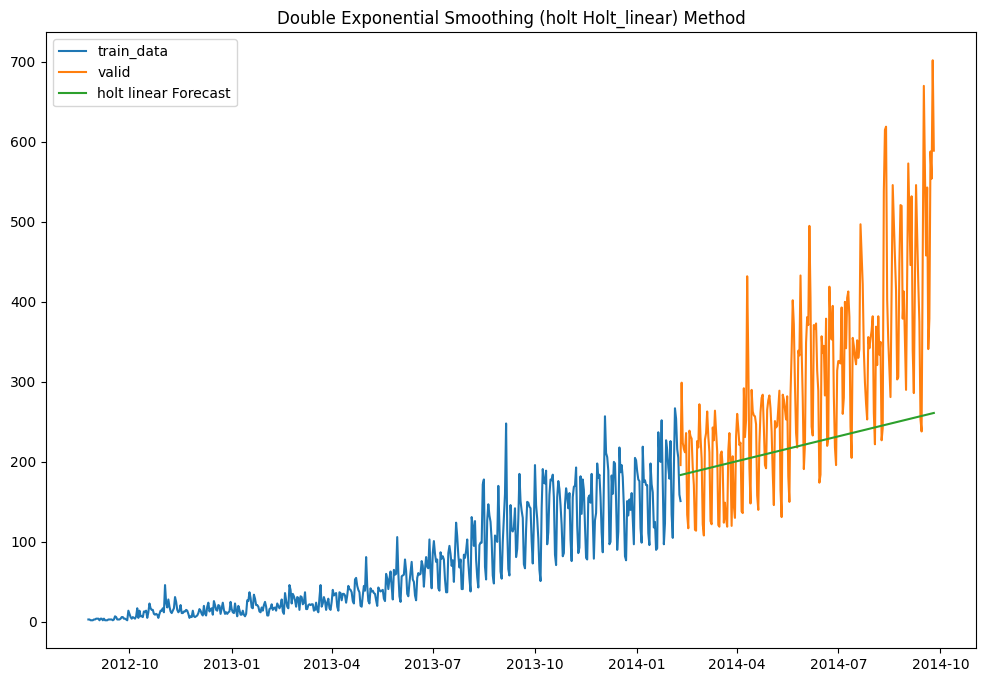

In [72]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_linear'], label='holt linear Forecast')
plt.legend(loc='best')
plt.title("Double Exponential Smoothing (holt Holt_linear) Method")
plt.show()

In [73]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['Holt_linear']))
print('The RMSE value for Holt Linear Method is', rmse)

The RMSE value for Holt Linear Method is 129.73859103373402


# Holt's Winters (aka triple exponential smoothing)

In [74]:
from statsmodels.tsa.api import ExponentialSmoothing

In [136]:
model = ExponentialSmoothing(np.asarray(train_data['count']) ,seasonal_periods=7 ,trend='add', seasonal='mul',)
fit1 = model.fit(smoothing_level=0.15, smoothing_slope=0.01, smoothing_seasonal=0.005) #

valid_data['Holt_Winter'] = fit1.forecast(len(valid_data)) 

In [137]:
model.params

{'smoothing_level': 0.15,
 'smoothing_trend': 0.01,
 'smoothing_seasonal': 0.005,
 'damping_trend': nan,
 'initial_level': 1.9862337447643954,
 'initial_trend': -0.12575225654112412,
 'initial_seasons': array([1.03684821, 0.95048412, 2.02308192, 2.16325335, 2.11160534,
        2.0915582 , 1.74217919]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

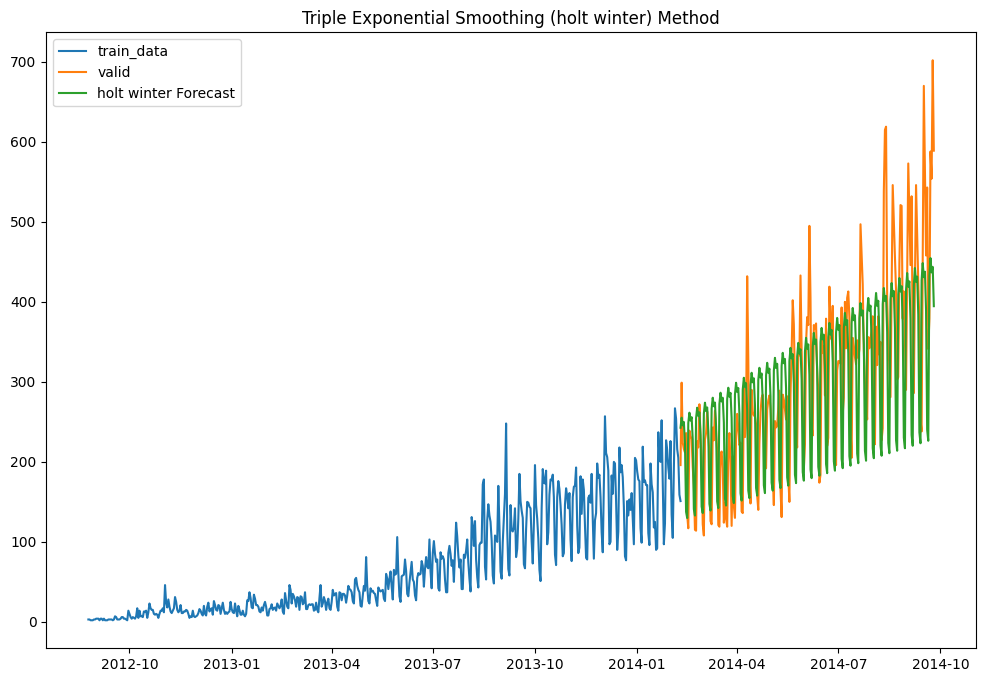

In [138]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [139]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['Holt_Winter']))
print('The RMSE value for Holt Winter Method is', rmse)

The RMSE value for Holt Winter Method is 96.46898235970497
